In [1]:
using Jenks, PyPlot, StatsBase

┌ Info: Recompiling stale cache file /home/kloewer/.julia/compiled/v1.1/Jenks/4vqQF.ji for Jenks [d5b3b923-ed72-5692-9b89-ee094da2a675]
└ @ Base loading.jl:1184
┌ Warning: Package Jenks does not have StatsBase in its dependencies:
│ - If you have Jenks checked out for development and have
│   added StatsBase as a dependency but haven't updated your primary
│   environment's manifest file, try `Pkg.resolve()`.
│ - Otherwise you may need to report an issue with Jenks
└ Loading StatsBase into Jenks from project dependency, future warnings for Jenks are suppressed.


In [2]:
N(n,σ,μ) = σ*randn(Int(n)).+μ

N (generic function with 1 method)

In [3]:
data = vcat(N(1e7,3,5),N(1e7,0.5,3),N(1e7,2,-3),N(1e7,0.4,0));
#data = vcat(N(1,-5),N(1,0),N(1,5),N(1,10));

In [4]:
H = fit(Histogram,data,nbins=500);
edges = collect(H.edges[1][1:end-1]);
w = H.weights;

In [6]:
nclasses = 4
JR1 = JenksClassification(nclasses,data,maxiter=1,flux=0.0);
JR2 = JenksClassification(nclasses,data,maxiter=100,errornorm=1,flux=0.005);
JR3 = JenksClassification(nclasses,data,maxiter=100,errornorm=2,flux=0.005);

100%: ARE=1.01123210, finished in 0.18s.
100%: ARE=0.75206622, finished in 18.55s.
100%: GVF=0.91295555, finished in 18.54s.


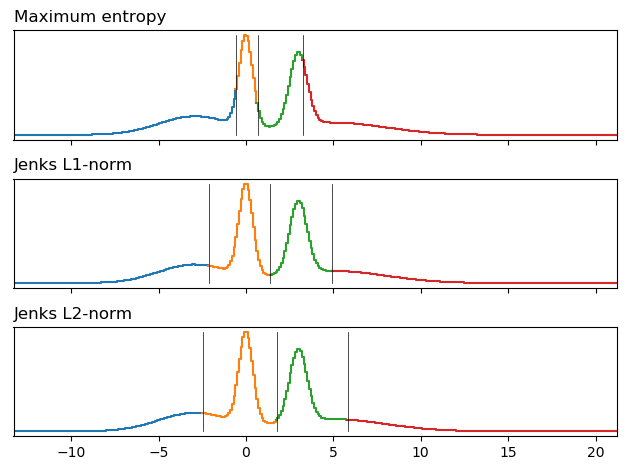

In [17]:
fig,(ax1,ax2,ax3) = subplots(3,1,sharex=true,sharey=true)

for (ax,JR) in zip((ax1,ax2,ax3),(JR1,JR2,JR3))
    for i in 1:nclasses
        inclass = (edges .< JR.bounds[i+1]+1e-1).*(edges .>= JR.bounds[i]-1e-1)
        ax.plot(edges[inclass],w[inclass],drawstyle="steps-post")
        ax.plot([JR.bounds[i],JR.bounds[i]],[0,maximum(w)],"k",lw=0.5)
    end
end

ax1.set_title("Maximum entropy",loc="left")
ax2.set_title("Jenks L1-norm",loc="left")
ax3.set_title("Jenks L2-norm",loc="left")

yticks([])
xlim(edges[1],edges[end])
tight_layout()